<h1>La Liga Players Dataset</h1>

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid")


In [2]:
data = pd.read_csv("../data/la_liga_players.csv")
data2 = pd.read_csv("../data/player_trophies.csv")

pd.set_option('display.max_columns', None)
df = data.copy()
df_trophies = data2.copy()
df.head()

,id,position,name,first_name,last_name,twitter_username,twitter_followers,age,nationality,height,weight,minutes,goals,assists,saves,rating,team_name,goals_minutes_coeff,saves_minutes_coeff,assists_minutes_coeff,rating_minutes_coeff,titles
0,131,Attacker,L. Messi,Lionel Andrés,Messi Cuccittini,TeamMessi,2981579.0,34.0,Argentina,170.0,72.0,2392,23,8,0,8.28571,Barcelona,0.009615,0.000000,0.003344,0.003464,43.0
1,338,Goalkeeper,Dani Cárdenas,Daniel,Cárdenas Lindez,None,NaN,24.0,Spain,186.0,80.0,270,0,0,19,8.03333,Levante,0.000000,0.070370,0.000000,0.029753,0.0
2,299,Goalkeeper,Ángel Jiménez,Ángel,Jiménez,None,NaN,19.0,Spain,NaN,NaN,90,0,0,7,8.00000,Granada CF,0.000000,0.077778,0.000000,0.088889,0.0
3,487,Goalkeeper,Juan Pérez,Juan Manuel,Pérez Ruiz,None,NaN,25.0,Spain,187.0,83.0,90,0,0,3,7.70000,Osasuna,0.000000,0.033333,0.000000,0.085556,1.0
4,91,Midfielder,T. Kroos,Toni,Kroos,ToniKroos,8945966.0,31.0,Germany,183.0,76.0,2031,3,8,0,7.69259,Real Madrid,0.001477,0.000000,0.003939,0.003788,28.0


In [3]:
df.describe()

,id,twitter_followers,age,height,weight,minutes,goals,assists,saves,rating,goals_minutes_coeff,saves_minutes_coeff,assists_minutes_coeff,rating_minutes_coeff,titles
count,728.000000,1.100000e+01,723.000000,657.000000,622.000000,728.000000,728.000000,728.000000,728.000000,728.000000,548.000000,548.000000,548.000000,548.000000,728.000000
mean,364.500000,8.945298e+06,26.338866,181.097412,74.530547,796.994505,0.962912,0.655220,1.990385,5.000513,0.001040,0.001834,0.000785,0.044372,2.835165
std,210.299786,7.341798e+06,4.755224,6.264467,6.487560,815.275044,2.307216,1.361921,10.745584,2.962310,0.001841,0.007668,0.001980,0.147702,5.284508
min,1.000000,2.932290e+05,17.000000,163.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,182.750000,2.544844e+06,22.000000,176.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003826,0.000000
50%,364.500000,8.945966e+06,26.000000,182.000000,74.000000,501.500000,0.000000,0.000000,0.000000,6.637500,0.000000,0.000000,0.000000,0.006746,1.000000
75%,546.250000,1.451018e+07,30.000000,186.000000,79.000000,1491.250000,1.000000,1.000000,0.000000,6.825000,0.001339,0.000000,0.001126,0.016596,3.000000
max,728.000000,1.995565e+07,41.000000,199.000000,96.000000,2700.000000,23.000000,10.000000,95.000000,8.285710,0.014085,0.077778,0.035714,1.675000,43.000000


<h2>Breakdown of LaLiga players by their position and age:</h2>

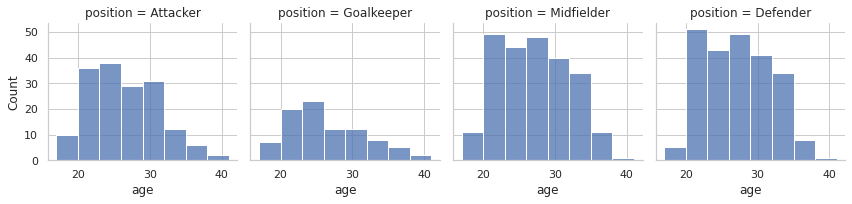

In [4]:
sns.displot(
    df, x="age", col="position",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

<h2>Breakdown of LaLiga players by their position and height:</h2>

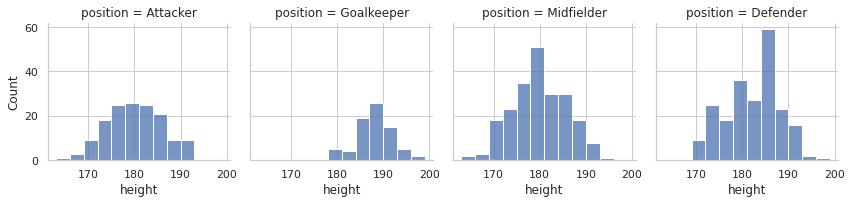

In [5]:
sns.displot(
    df, x="height", col="position",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

<h2>Breakdown of LaLiga players by their position and weight:</h2>

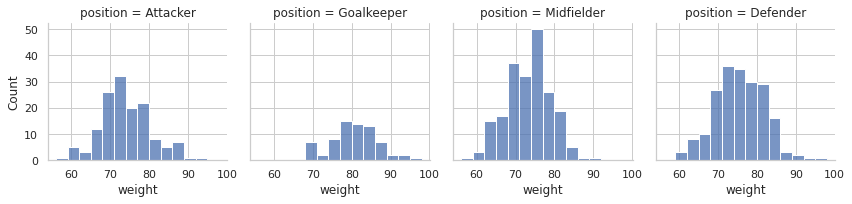

In [6]:
sns.displot(
    df, x="weight", col="position",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

<h2>Players with most Twitter followers:</h2>

In [29]:
df.sort_values('twitter_followers', ascending = False)[['name', 'titles','twitter_followers', 'team_name', 'nationality']].head(11).style.background_gradient('viridis')

,name,titles,twitter_followers,team_name,nationality
68,Piqué,43.000000,19955646.000000,Barcelona,Spain
14,Sergio Ramos,27.000000,18373158.000000,Real Madrid,Spain
10,L. Suárez,23.000000,16771025.000000,Atletico Madrid,Uruguay
7,K. Benzema,29.000000,12249337.000000,Real Madrid,France
81,Marcelo,24.000000,12148591.000000,Real Madrid,Brazil
4,T. Kroos,28.000000,8945966.000000,Real Madrid,Germany
0,L. Messi,43.000000,2981579.000000,Barcelona,Argentina
24,Sergi Roberto,32.000000,2672395.000000,Barcelona,Spain
27,Jordi Alba,23.000000,2417294.000000,Barcelona,Spain
109,S. Umtiti,16.000000,1590058.000000,Barcelona,France


<h2>Players with most Titles Won (all cups):</h2>


In [8]:
df.sort_values('titles', ascending = False)[['name', 'titles', 'team_name', 'nationality']].head(10).style.background_gradient('viridis')

,name,titles,team_name,nationality
0,L. Messi,43.000000,Barcelona,Argentina
68,Piqué,43.000000,Barcelona,Spain
58,Sergio Busquets,39.000000,Barcelona,Spain
24,Sergi Roberto,32.000000,Barcelona,Spain
7,K. Benzema,29.000000,Real Madrid,France
4,T. Kroos,28.000000,Real Madrid,Germany
14,Sergio Ramos,27.000000,Real Madrid,Spain
597,Rafinha,25.000000,Barcelona,Brazil
81,Marcelo,24.000000,Real Madrid,Brazil
601,J. Rodríguez,23.000000,Real Madrid,Colombia


<h2>Most Goals Updated April 12, 2021:</h2>


In [9]:
df.sort_values('goals', ascending = False)[['name', 'goals', 'rating', 'team_name', 'nationality']].head(10).style.background_gradient('viridis')

,name,goals,rating,team_name,nationality
0,L. Messi,23,8.285710,Barcelona,Argentina
5,Gerard Moreno,19,7.683330,Villarreal,Spain
10,L. Suárez,19,7.307690,Atletico Madrid,Uruguay
7,K. Benzema,19,7.442310,Real Madrid,France
54,Y. En-Nesyri,15,7.027590,Sevilla,Morocco
47,A. Isak,12,7.036000,Real Sociedad,Sweden
133,Rafa Mir,12,6.880000,Huesca,Spain
97,Roger Martí,11,6.934620,Levante,Spain
19,Mikel Oyarzabal,10,7.237500,Real Sociedad,Spain
117,Morales,10,6.906670,Levante,Spain


<h2>Most Assists Updated April 12, 2021:</h2>


In [10]:
df.sort_values('assists', ascending = False)[['name', 'assists','position', 'team_name', 'nationality']].head(10).style.background_gradient('viridis')


,name,assists,position,team_name,nationality
6,Iago Aspas,10,Attacker,Celta Vigo,Spain
0,L. Messi,8,Attacker,Barcelona,Argentina
38,Llorente,8,Midfielder,Atletico Madrid,Spain
4,T. Kroos,8,Midfielder,Real Madrid,Germany
242,Jorge de Frutos,7,Attacker,Levante,Spain
23,Sergio Canales,6,Midfielder,Real Betis,Spain
25,Navas,6,Defender,Sevilla,Spain
15,K. Trippier,6,Defender,Atletico Madrid,England
30,A. Griezmann,6,Attacker,Barcelona,France
19,Mikel Oyarzabal,6,Attacker,Real Sociedad,Spain


<h2>Most Saves By a Goalkeeper updated April 12, 2021:</h2>


In [11]:
df.sort_values('saves', ascending = False)[['name', 'saves','position', 'team_name', 'nationality']].head(10).style.background_gradient('viridis')


,name,saves,position,team_name,nationality
151,Edgar Badia,95,Goalkeeper,Elche,Spain
31,J. Oblak,78,Goalkeeper,Atletico Madrid,Slovenia
146,Jaume Doménech,77,Goalkeeper,Valencia,Spain
304,Pacheco,75,Goalkeeper,Alaves,Spain
288,Rui Silva,74,Goalkeeper,Granada CF,Portugal
64,T. Courtois,70,Goalkeeper,Real Madrid,Belgium
195,Aitor Fernández,70,Goalkeeper,Levante,Spain
158,M. Dmitrović,70,Goalkeeper,Eibar,Serbia
28,Y. Bounou,67,Goalkeeper,Sevilla,Morocco
333,J. Ledesma,67,Goalkeeper,Cadiz,Argentina


<h2>Heaviest Player in Kilos</h2>


In [12]:
df.sort_values('weight', ascending = False)[['name', 'weight','position', 'team_name', 'nationality']].head(10).style.background_gradient('viridis')

,name,weight,position,team_name,nationality
64,T. Courtois,96.000000,Goalkeeper,Real Madrid,Belgium
295,Víctor Ruíz,95.000000,Defender,Real Betis,Spain
158,M. Dmitrović,94.000000,Goalkeeper,Eibar,Serbia
371,Roberto Jiménez,94.000000,Goalkeeper,Valladolid,Spain
417,Alcalá,93.000000,Defender,Cadiz,Spain
82,Willian José,93.000000,Attacker,Real Sociedad,Brazil
288,Rui Silva,91.000000,Goalkeeper,Granada CF,Portugal
66,M. Gómez,91.000000,Attacker,Valencia,Uruguay
543,P. Gazzaniga,90.000000,Goalkeeper,Elche,Argentina
334,I. Marcone,90.000000,Midfielder,Elche,Argentina


<h2>Tallest Player in centimeters:</h2>


In [13]:
df.sort_values('height', ascending = False)[['name', 'height', 'position', 'team_name', 'nationality']].head(10).style.background_gradient('viridis')

,name,height,position,team_name,nationality
64,T. Courtois,199.000000,Goalkeeper,Real Madrid,Belgium
417,Alcalá,196.000000,Defender,Cadiz,Spain
543,P. Gazzaniga,196.000000,Goalkeeper,Elche,Argentina
571,I. Grbić,195.000000,Goalkeeper,Atletico Madrid,Croatia
317,Joel Robles,195.000000,Goalkeeper,Real Betis,Spain
68,Piqué,194.000000,Defender,Barcelona,Spain
158,M. Dmitrović,194.000000,Goalkeeper,Eibar,Serbia
642,Jokin Ezkieta,193.000000,Goalkeeper,Athletic Club,Spain
157,U. Račić,193.000000,Midfielder,Valencia,Serbia
584,Petr Kudakovskiy,193.000000,Goalkeeper,Levante,Russia


<h2>Top 10 Youngest Players:</h2>


In [14]:
df.sort_values('age', ascending = True)[['name', 'age', 'team_name', 'nationality']].head(12).style.background_gradient('viridis')

,name,age,team_name,nationality
546,Unai Ayala,17.000000,Eibar,Spain
624,Jesús Vázquez,18.000000,Valencia,Spain
567,Adrián Corral,18.000000,Atletico Madrid,Spain
548,Adrián Corral,18.000000,Atletico Madrid,Spain
721,Juanlu,18.000000,Sevilla,Spain
722,Carlos Álvarez,18.000000,Sevilla,Spain
449,Miguel Rodríguez,18.000000,Celta Vigo,Spain
606,Rafael Romero,18.000000,Granada CF,Spain
63,Ilaix Kourouma,18.000000,Barcelona,Spain
526,John Patrick,18.000000,Getafe,Spain


<h2>Distribution of Weight among Teams</h2>


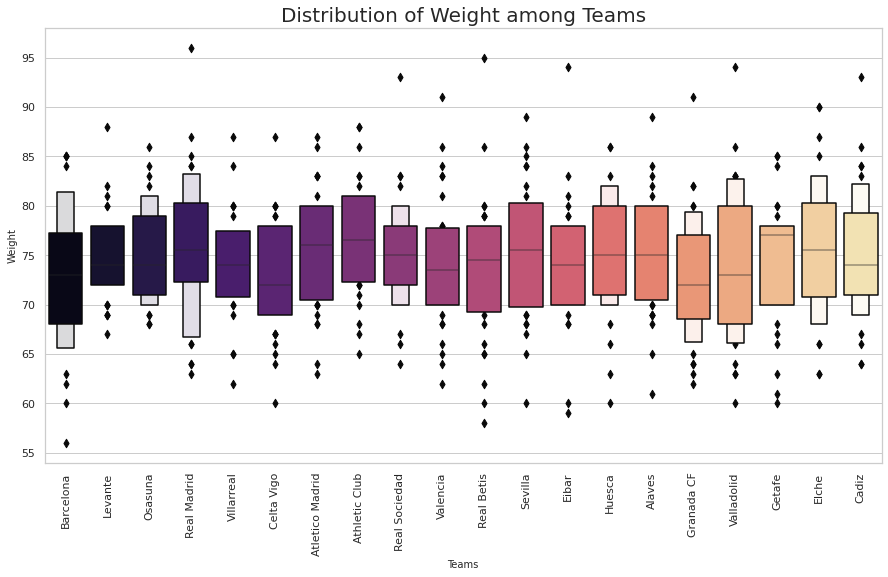

In [15]:
some_clubs = ('Barcelona', 'Levante', 'Granada CF', 'Real Madrid', 'Osasuna', 'Villarreal', 'Celta Vigo', 'Atletico Madrid',
              'Elche', 'Athletic Club', 'Real Sociedad', 'Valencia', 'Real Betis', 'Sevilla', 'Eibar', 'Huesca', 'Alaves', 'Valladolid', 'Getafe', 'Cadiz')

data_club = data.loc[data['team_name'].isin(some_clubs) & data['weight']]
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'team_name', y = 'weight', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Teams', fontsize = 10)
ax.set_ylabel(ylabel = 'Weight', fontsize = 10)
ax.set_title(label = 'Distribution of Weight among Teams', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

<h2>Distribution of Overall Ratings in Teams</h2>


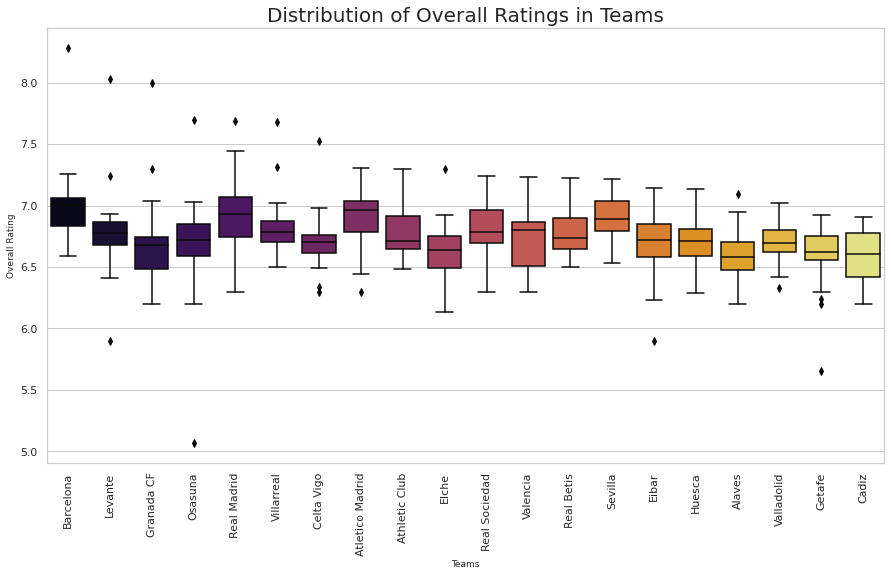

In [16]:
some_clubs = ('Barcelona', 'Levante', 'Granada CF', 'Real Madrid', 'Osasuna', 'Villarreal', 'Celta Vigo', 'Atletico Madrid', 'Elche', 'Athletic Club', 'Real Sociedad', 'Valencia', 'Real Betis', 'Sevilla', 'Eibar', 'Huesca', 'Alaves', 'Valladolid', 'Getafe', 'Cadiz')
data_clubs = data.loc[df['team_name'].isin(some_clubs) & data['rating']]
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['team_name'], y = data_clubs['rating'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Teams', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Rating', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Ratings in Teams', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

<h2>Distribution of Height among Teams</h2>


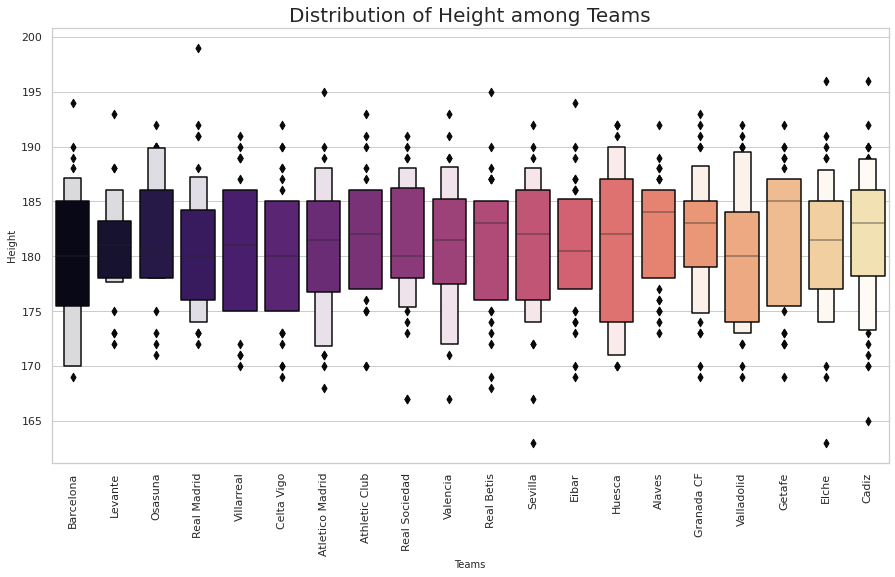

In [17]:
some_clubs = ('Barcelona', 'Levante', 'Granada CF', 'Real Madrid', 'Osasuna', 'Villarreal', 'Celta Vigo', 'Atletico Madrid',
              'Elche', 'Athletic Club', 'Real Sociedad', 'Valencia', 'Real Betis', 'Sevilla', 'Eibar', 'Huesca', 'Alaves', 'Valladolid', 'Getafe', 'Cadiz')
data_club = data.loc[data['team_name'].isin(some_clubs) & data['height']]
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'team_name', y = 'height', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Teams', fontsize = 10)
ax.set_ylabel(ylabel = 'Height', fontsize = 10)
ax.set_title(label = 'Distribution of Height among Teams', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

<h2>Distribution of Ages among Teams</h2>


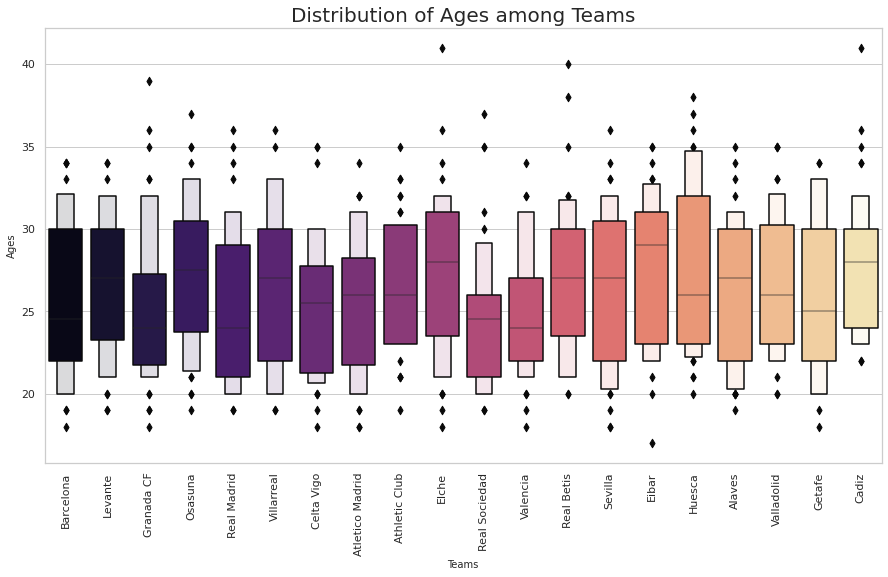

In [18]:
some_clubs = ('Barcelona', 'Levante', 'Granada CF', 'Real Madrid', 'Osasuna', 'Villarreal', 'Celta Vigo', 'Atletico Madrid',
              'Elche', 'Athletic Club', 'Real Sociedad', 'Valencia', 'Real Betis', 'Sevilla', 'Eibar', 'Huesca', 'Alaves', 'Valladolid', 'Getafe', 'Cadiz')
data_club = data.loc[data['team_name'].isin(some_clubs) & data['age']]
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'team_name', y = 'age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Teams', fontsize = 10)
ax.set_ylabel(ylabel = 'Ages', fontsize = 10)
ax.set_title(label = 'Distribution of Ages among Teams', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

<h2>Distribution of Ratings of Players From Different Countries</h2>


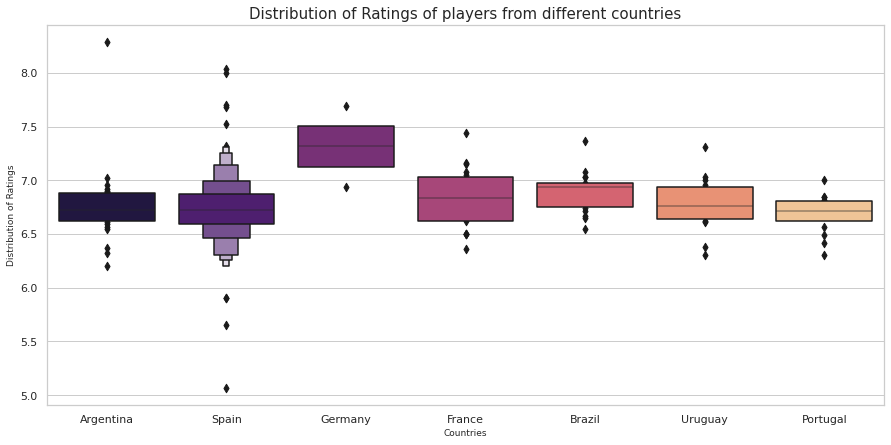

In [19]:
some_countries = ('Germany', 'Spain','Uruguay', 'Argentina', 'France', 'Brazil', 'Portugal', 'Columbia')
data_countries = data.loc[data['nationality'].isin(some_countries) & data['rating']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['nationality'], y = data_countries['rating'], palette = 'magma')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of Ratings', fontsize = 9)
ax.set_title(label = 'Distribution of Ratings of players from different countries', fontsize = 15)
plt.savefig("../images/ratingsdis.png")
plt.show()


<h2>Every Countries Player and their Weights</h2>


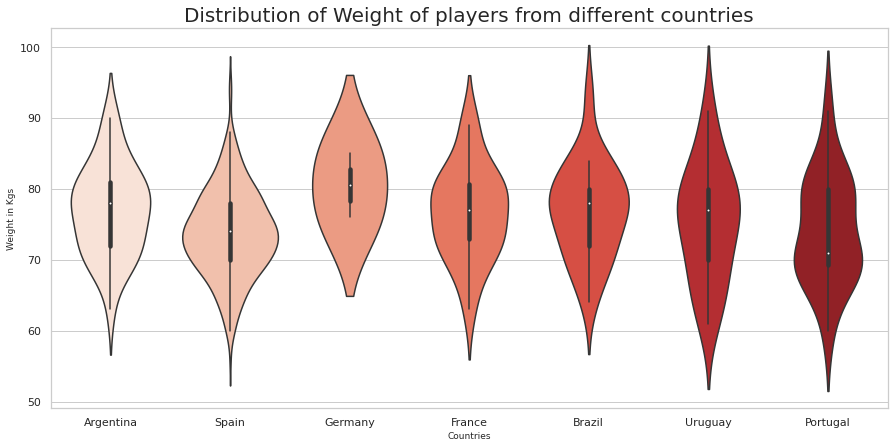

In [20]:
some_countries = ('Germany', 'Spain','Uruguay', 'Argentina', 'France', 'Brazil', 'Portugal', 'Columbia')
data_countries = df.loc[data['nationality'].isin(some_countries) & data['weight']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['nationality'], y = data_countries['weight'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in Kgs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

<h2>Every Countries Player and their Heights</h2>


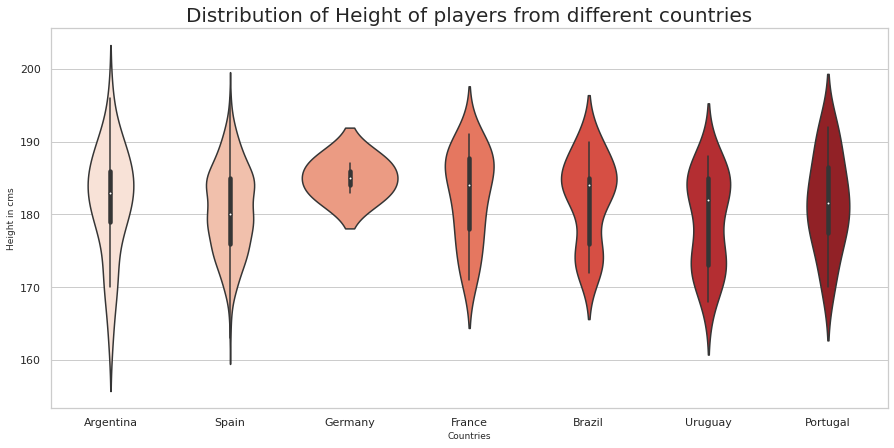

In [21]:
some_countries = ('Germany', 'Spain','Uruguay', 'Argentina', 'France', 'Brazil', 'Portugal', 'Columbia')
data_countries = df.loc[data['nationality'].isin(some_countries) & data['height']]
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['nationality'], y = data_countries['height'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Height in cms', fontsize = 9)
ax.set_title(label = 'Distribution of Height of players from different countries', fontsize = 20)
plt.show()

<h2>Comparison of Overall Ratings and Age by Position</h2>


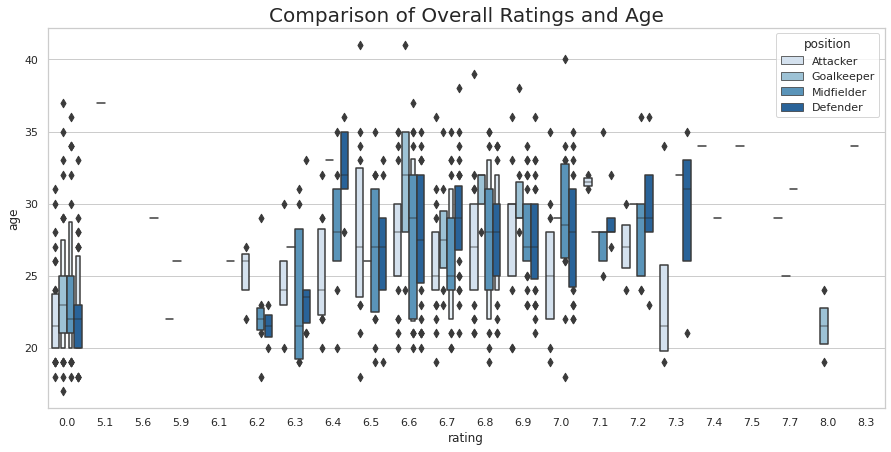

In [22]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-dark-palette')
sns.boxenplot(df['rating'].round(1), df['age'], hue = df['position'], palette = 'Blues')
plt.title('Comparison of Overall Ratings and Age', fontsize = 20)
plt.show()

<h2>Top 10 Nations in La Liga</h2>


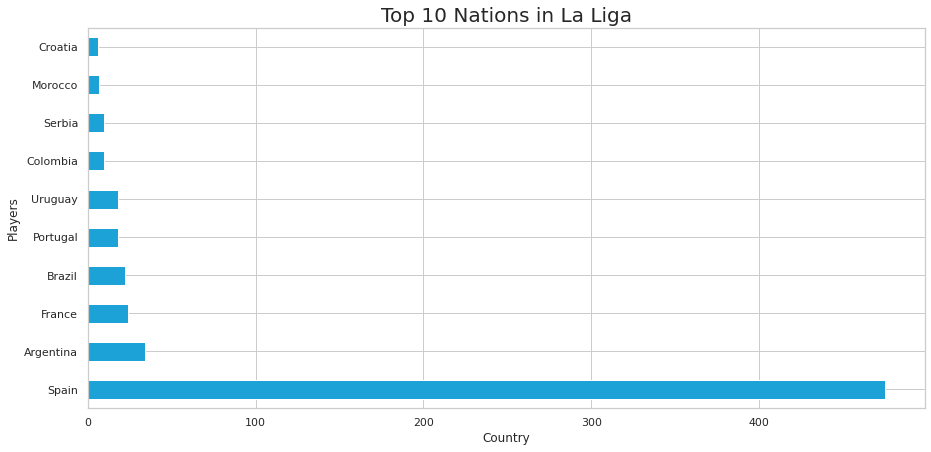

In [23]:
df['nationality'].value_counts().head(10).plot.barh(color="#1da2d8", figsize = (15, 7))
plt.title('Top 10 Nations in La Liga', fontsize = 20, fontweight = 14)
plt.xlabel('Country')
plt.ylabel('Players')
plt.show()

<h2>Distibution of Player Height</h2>

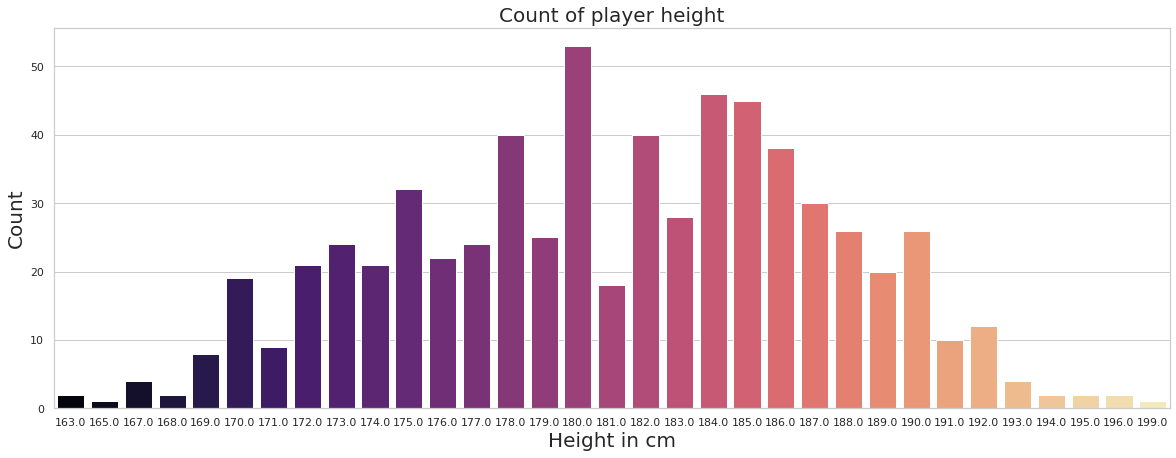

In [24]:
plt.figure(figsize = (20, 7))
ax = sns.countplot(x = 'height', data = df, palette = 'magma')
ax.set_title(label = 'Count of player height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in cm', fontsize = 20)
ax.set_ylabel(ylabel = 'Count', fontsize = 20)
plt.show()

<h2>Distribution of Player Weight:</h2>


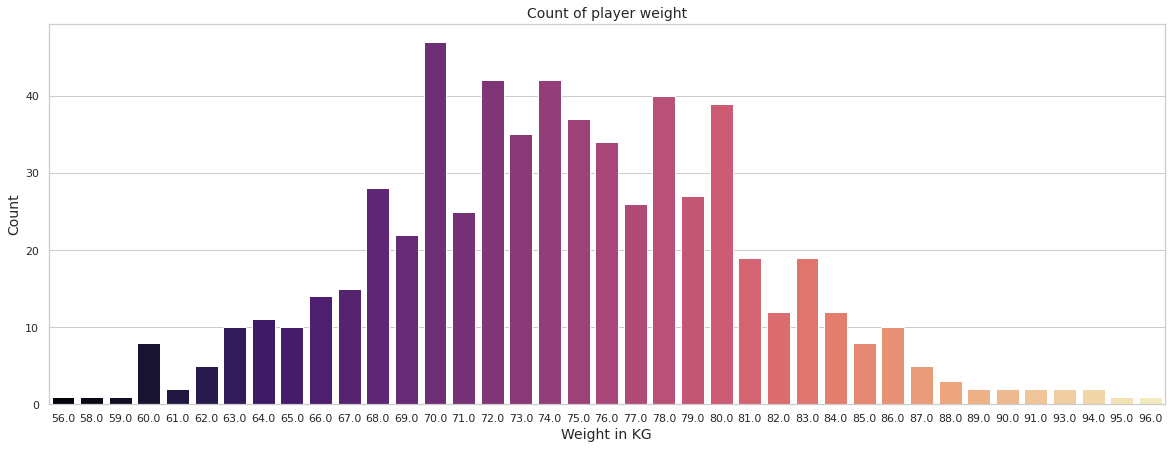

In [25]:
plt.figure(figsize = (20, 7))
ax = sns.countplot(x = 'weight', data = df, palette = 'magma')
ax.set_title(label = 'Count of player weight', fontsize = 14)
ax.set_xlabel(xlabel = 'Weight in KG', fontsize = 14)
ax.set_ylabel(ylabel = 'Count', fontsize = 14)
plt.show()

<h2>Distribution of Player Age</h2>

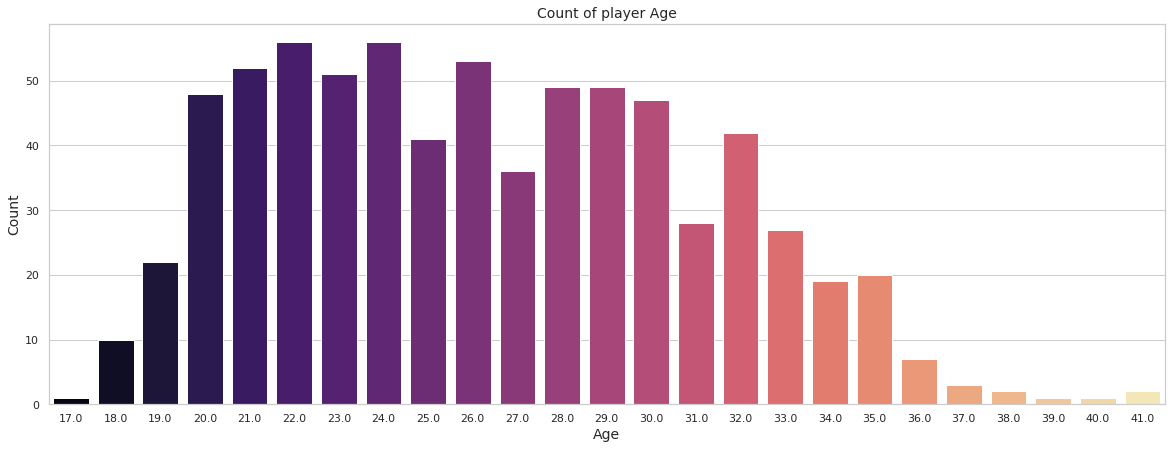

In [26]:
plt.figure(figsize = (20, 7))
ax = sns.countplot(x = 'age', data = df, palette = 'magma')
ax.set_title(label = 'Count of player Age', fontsize = 14)
ax.set_xlabel(xlabel = 'Age', fontsize = 14)
ax.set_ylabel(ylabel = 'Count', fontsize = 14)
plt.show()

<h2>Heatmap of the Correlation in the Dataset</h2>

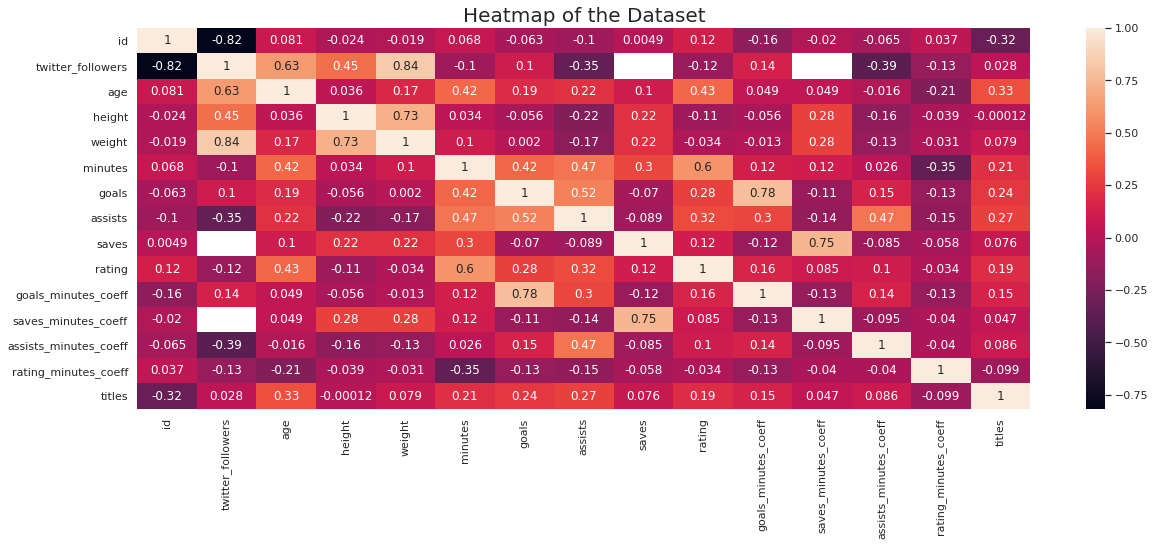

In [27]:
plt.rcParams['figure.figsize'] = (20, 7)
sns.heatmap(df.corr(), annot = True)
plt.title('Heatmap of the Dataset', fontsize = 20)
plt.show()

KDE PLot of weight and hight based on position:

<AxesSubplot:xlabel='height', ylabel='weight'>

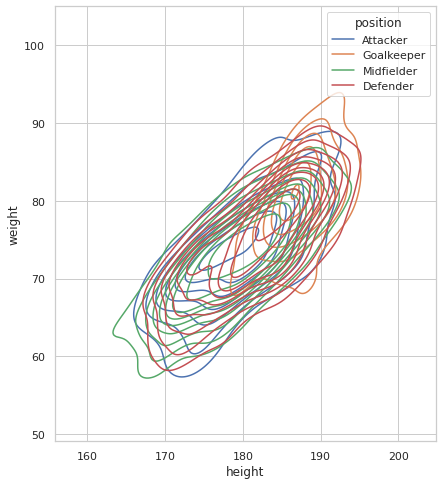

In [28]:
sns.set_theme(style="whitegrid")
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

sns.kdeplot(
    data=df,
    x="height",
    y="weight",
    hue="position",
    thresh=.1,
)